<a href="https://colab.research.google.com/github/SodisettiRakesh123/hanuman-/blob/main/unstop%20ML%20task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = '/content/68e8d1d70b66d_student_resource.zip'

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        print("Zip file is valid. Contents:")
        zip_ref.printdir()
except zipfile.BadZipFile:
    print("Error: The file is not a valid zip file.")
except FileNotFoundError:
    print(f"Error: File not found at {zip_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Zip file is valid. Contents:
File Name                                             Modified             Size
student_resource/                              2025-10-07 14:03:42            0
__MACOSX/._student_resource                    2025-10-07 14:03:42          212
student_resource/sample_code.py                2025-09-17 15:50:50         1332
__MACOSX/student_resource/._sample_code.py     2025-09-17 15:50:50          212
student_resource/Documentation_template.md     2025-09-17 16:31:50         1794
__MACOSX/student_resource/._Documentation_template.md 2025-09-17 16:31:50          212
student_resource/.DS_Store                     2025-10-10 14:24:40         6148
__MACOSX/student_resource/._.DS_Store          2025-10-10 14:24:40          120
student_resource/dataset/                      2025-09-17 20:15:02            0
__MACOSX/student_resource/._dataset            2025-09-17 20:15:02          212
student_resource/README.md                     2025-10-06 12:09:54         5562
__MA

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import zipfile

# Path to the zip file
zip_path = '/content/68e8d1d70b66d_student_resource.zip' # Replace with the actual path to the zip file
extract_dir = '/content/student_resource' # Directory to extract to
data_dir = os.path.join(extract_dir, 'student_resource', 'dataset') # Corrected path to the dataset directory after extraction

# Unzip the file
print(f"Attempting to unzip {zip_path} to {extract_dir}...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Unzipping complete.")

# Add checks to list directory contents after extraction
print(f"\nContents of extraction directory ({extract_dir}):")
try:
    for item in os.listdir(extract_dir):
        print(item)
except FileNotFoundError:
    print(f"Error: Extraction directory not found at {extract_dir}")


print(f"\nContents of data directory ({data_dir}):")
try:
    for item in os.listdir(data_dir):
        print(item)
except FileNotFoundError:
    print(f"Error: Data directory not found at {data_dir}")


# Load CSV from dataset folder
print(f"\nAttempting to load CSVs from {data_dir}...")
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))
print("CSVs loaded successfully.")


# Extract 'catalog_content' from train and test for text feature processing
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')

X_train_text = tfidf.fit_transform(train_df['catalog_content'].fillna(''))
X_test_text = tfidf.transform(test_df['catalog_content'].fillna(''))

y_train = train_df['price']

# Train validation split (optional)
from sklearn.model_selection import train_test_split
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_text, y_train, test_size=0.2, random_state=42)

# Train model example
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_part, y_train_part)

# Validation prediction and score
val_pred = model.predict(X_val)
val_pred = np.maximum(val_pred, 0)  # Ensure positive prices

def smape(y_true, y_pred):
    return np.mean(200 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

print(f"Validation SMAPE: {smape(y_val, val_pred):.4f}")

# Predict on test set
test_pred = model.predict(X_test_text)
test_pred = np.maximum(test_pred, 0)

# Save results to CSV file in correct format
output_df = pd.DataFrame({'sample id': test_df['sample_id'], 'price': test_pred}) # Corrected column name
output_df.to_csv('test_out.csv', index=False)

Attempting to unzip /content/68e8d1d70b66d_student_resource.zip to /content/student_resource...
Unzipping complete.

Contents of extraction directory (/content/student_resource):
student_resource
__MACOSX

Contents of data directory (/content/student_resource/student_resource/dataset):
sample_test_out.csv
test.csv
train.csv
sample_test.csv

Attempting to load CSVs from /content/student_resource/student_resource/dataset...
CSVs loaded successfully.
Validation SMAPE: 70.1579


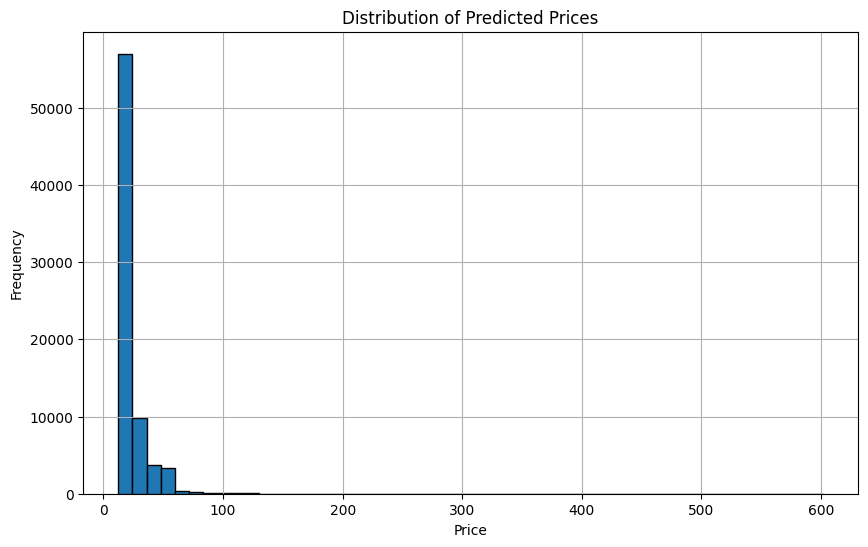

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(output_df['price'], bins=50, edgecolor='black')
plt.title('Distribution of Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
display(output_df.describe())

,sample id,price
count,75000.000000,75000.000000
mean,149387.988880,23.564418
std,86763.376732,12.836785
min,1.000000,12.444232
25%,73760.500000,16.917934
50%,149109.500000,19.720226
75%,224529.750000,23.941317
max,299439.000000,601.558443


In [ ]:
display(output_df)

,sample id,price
0,100179,24.875421
1,245611,22.360381
2,146263,35.537763
3,95658,19.108622
4,36806,20.671721
...,...,...
74995,93616,16.167481
74996,249434,22.644275
74997,162217,16.393372
74998,230487,25.730760
